In [1]:
import pandas as pd

file = pd.read_csv(r"C:\Users\belve\Downloads\Electric_cars_dataset.csv")
file_copy = file.copy()
file.head()

,ID,VIN (1-10),County,City,State,ZIP Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,Expected Price ($1k)
0,EV33174,5YJ3E1EC6L,Snohomish,LYNNWOOD,WA,98037.0,2020.0,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,308,0,32.0,109821694,POINT (-122.287614 47.83874),PUGET SOUND ENERGY INC,50
1,EV40247,JN1AZ0CP8B,Skagit,BELLINGHAM,WA,98229.0,2011.0,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,73,0,40.0,137375528,POINT (-122.414936 48.709388),PUGET SOUND ENERGY INC,15
2,EV12248,WBY1Z2C56F,Pierce,TACOMA,WA,98422.0,2015.0,BMW,I3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,81,0,27.0,150627382,POINT (-122.396286 47.293138),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,18
3,EV55713,1G1RD6E44D,King,REDMOND,WA,98053.0,2013.0,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,45.0,258766301,POINT (-122.024951 47.670286),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),33.9
4,EV28799,1G1FY6S05K,Pierce,PUYALLUP,WA,98375.0,2019.0,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,25.0,296998138,POINT (-122.321062 47.103797),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,41.78


In [2]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64353 entries, 0 to 64352
Data columns (total 18 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   ID                                                 64353 non-null  object 
 1   VIN (1-10)                                         64353 non-null  object 
 2   County                                             64349 non-null  object 
 3   City                                               64344 non-null  object 
 4   State                                              64342 non-null  object 
 5   ZIP Code                                           64347 non-null  float64
 6   Model Year                                         64346 non-null  float64
 7   Make                                               64349 non-null  object 
 8   Model                                              64340 non-null  object 
 9   Electr

In [3]:
file.corr()

C:\Users\belve\AppData\Local\Temp\ipykernel_26432\1007512219.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  file.corr()


,ZIP Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID
ZIP Code,1.000000,-0.003737,-0.010247,-0.000139,-0.389266,-0.000843
Model Year,-0.003737,1.000000,-0.080631,-0.218313,0.021036,-0.116860
Electric Range,-0.010247,-0.080631,1.000000,0.052901,0.042348,0.041390
Base MSRP,-0.000139,-0.218313,0.052901,1.000000,0.002203,0.004771
Legislative District,-0.389266,0.021036,0.042348,0.002203,1.000000,0.001431
DOL Vehicle ID,-0.000843,-0.116860,0.041390,0.004771,0.001431,1.000000


In [3]:
from ydata_profiling import ProfileReport
report = ProfileReport(file, title="Electric_cars_dataset Report")
report.to_file("Electric_cars_dataset Report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [4]:
file.dropna(subset = ['County','City','State','ZIP Code','Model Year','Make','Model','Legislative District','Vehicle Location','Electric Utility'], inplace=True)

In [5]:
file.isnull().sum().sum()

0

In [6]:
file.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63081 entries, 0 to 64352
Data columns (total 18 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   ID                                                 63081 non-null  object 
 1   VIN (1-10)                                         63081 non-null  object 
 2   County                                             63081 non-null  object 
 3   City                                               63081 non-null  object 
 4   State                                              63081 non-null  object 
 5   ZIP Code                                           63081 non-null  float64
 6   Model Year                                         63081 non-null  float64
 7   Make                                               63081 non-null  object 
 8   Model                                              63081 non-null  object 
 9   Electr

<Axes: >

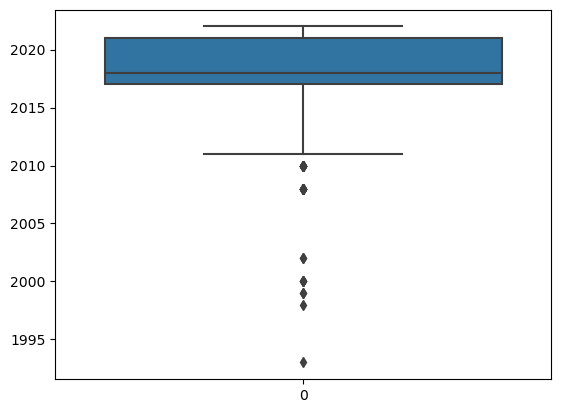

In [7]:
import seaborn as sns
sns.boxplot(file['Model Year'])

<Axes: >

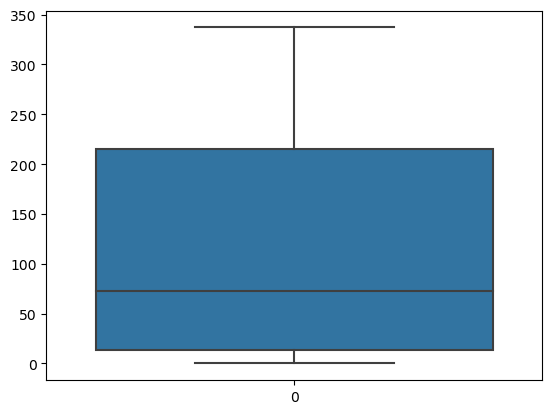

In [8]:
sns.boxplot(file['Electric Range'])

In [9]:
def outliers(df, ft):
    Q1 = df[ft].quantile(0.25)
    Q3 = df[ft].quantile(0.75)
    IQR = Q3 - Q1
    lower_boundary = Q1 - (IQR * 1.5)
    upper_boundary = Q3 + (IQR * 1.5)
    outliers_index = df.index[(df[ft] < lower_boundary) | (df[ft] > upper_boundary)]
    return outliers_index

In [10]:
outliers_list = []
for feature in ['Model Year']:
    outliers_list.extend(outliers(file, feature))

In [11]:
outliers_list

[1142,
 1183,
 1455,
 2072,
 3767,
 5617,
 7234,
 7287,
 9949,
 10616,
 11385,
 12207,
 16737,
 28711,
 29068,
 29292,
 30502,
 30604,
 33271,
 36305,
 37904,
 38334,
 43319,
 43377,
 44072,
 44411,
 44645,
 45356,
 48621,
 48734,
 52336,
 53436,
 54589,
 55127,
 56045,
 56694,
 57196,
 60522]

In [12]:
def remove_outliers(df, list):
    df = df.drop(list)
    return df

In [13]:
new_file = remove_outliers(file, outliers_list)

In [14]:
new_file

,ID,VIN (1-10),County,City,State,ZIP Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,Expected Price ($1k)
0,EV33174,5YJ3E1EC6L,Snohomish,LYNNWOOD,WA,98037.0,2020.0,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,308,0,32.0,109821694,POINT (-122.287614 47.83874),PUGET SOUND ENERGY INC,50
1,EV40247,JN1AZ0CP8B,Skagit,BELLINGHAM,WA,98229.0,2011.0,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,73,0,40.0,137375528,POINT (-122.414936 48.709388),PUGET SOUND ENERGY INC,15
2,EV12248,WBY1Z2C56F,Pierce,TACOMA,WA,98422.0,2015.0,BMW,I3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,81,0,27.0,150627382,POINT (-122.396286 47.293138),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,18
3,EV55713,1G1RD6E44D,King,REDMOND,WA,98053.0,2013.0,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,45.0,258766301,POINT (-122.024951 47.670286),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),33.9
4,EV28799,1G1FY6S05K,Pierce,PUYALLUP,WA,98375.0,2019.0,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,25.0,296998138,POINT (-122.321062 47.103797),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,41.78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64348,EV6357,KNDCE3LG7L,King,SEATTLE,WA,98144.0,2020.0,KIA,NIRO,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,239,0,37.0,156575107,POINT (-122.30033 47.585339),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),33
64349,EV423,JTDKN3DP2D,Pierce,TACOMA,WA,98402.0,2013.0,TOYOTA,PRIUS PLUG-IN,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,6,0,27.0,211048701,POINT (-122.443211 47.252172),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,13.3
64350,EV27852,1G1FX6S05J,King,SEATTLE,WA,98119.0,2018.0,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,36.0,135543411,POINT (-122.367721 47.639264),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),22.857
64351,EV830,WP1AE2A24H,King,SEATTLE,WA,98115.0,2017.0,PORSCHE,CAYENNE,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,14,0,46.0,192459907,POINT (-122.297534 47.685291),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),45.7


In [15]:
new_file.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63043 entries, 0 to 64352
Data columns (total 18 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   ID                                                 63043 non-null  object 
 1   VIN (1-10)                                         63043 non-null  object 
 2   County                                             63043 non-null  object 
 3   City                                               63043 non-null  object 
 4   State                                              63043 non-null  object 
 5   ZIP Code                                           63043 non-null  float64
 6   Model Year                                         63043 non-null  float64
 7   Make                                               63043 non-null  object 
 8   Model                                              63043 non-null  object 
 9   Electr

In [16]:
one_hot = pd.get_dummies(new_file['Make'])
new_file = new_file.drop('Make', axis=1)
new_file = new_file.join(one_hot)
new_file

,ID,VIN (1-10),County,City,State,ZIP Code,Model Year,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,...,PORSCHE,RIVIAN,SMART,SUBARU,TESLA,TH!NK,TOYOTA,VOLKSWAGEN,VOLVO,WHEEGO ELECTRIC CARS
0,EV33174,5YJ3E1EC6L,Snohomish,LYNNWOOD,WA,98037.0,2020.0,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,...,0,0,0,0,1,0,0,0,0,0
1,EV40247,JN1AZ0CP8B,Skagit,BELLINGHAM,WA,98229.0,2011.0,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,...,0,0,0,0,0,0,0,0,0,0
2,EV12248,WBY1Z2C56F,Pierce,TACOMA,WA,98422.0,2015.0,I3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,...,0,0,0,0,0,0,0,0,0,0
3,EV55713,1G1RD6E44D,King,REDMOND,WA,98053.0,2013.0,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,...,0,0,0,0,0,0,0,0,0,0
4,EV28799,1G1FY6S05K,Pierce,PUYALLUP,WA,98375.0,2019.0,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64348,EV6357,KNDCE3LG7L,King,SEATTLE,WA,98144.0,2020.0,NIRO,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,...,0,0,0,0,0,0,0,0,0,0
64349,EV423,JTDKN3DP2D,Pierce,TACOMA,WA,98402.0,2013.0,PRIUS PLUG-IN,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,...,0,0,0,0,0,0,1,0,0,0
64350,EV27852,1G1FX6S05J,King,SEATTLE,WA,98119.0,2018.0,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,...,0,0,0,0,0,0,0,0,0,0
64351,EV830,WP1AE2A24H,King,SEATTLE,WA,98115.0,2017.0,CAYENNE,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,...,1,0,0,0,0,0,0,0,0,0


In [17]:
one_hot = pd.get_dummies(new_file['Model'])
new_file = new_file.drop('Model', axis=1)
new_file = new_file.join(one_hot)
new_file

,ID,VIN (1-10),County,City,State,ZIP Code,Model Year,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,...,WRANGLER,X3,X5,XC40,XC60,XC60 AWD,XC60 AWD PHEV,XC90,XC90 AWD,XC90 AWD PHEV
0,EV33174,5YJ3E1EC6L,Snohomish,LYNNWOOD,WA,98037.0,2020.0,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,308,...,0,0,0,0,0,0,0,0,0,0
1,EV40247,JN1AZ0CP8B,Skagit,BELLINGHAM,WA,98229.0,2011.0,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,73,...,0,0,0,0,0,0,0,0,0,0
2,EV12248,WBY1Z2C56F,Pierce,TACOMA,WA,98422.0,2015.0,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,81,...,0,0,0,0,0,0,0,0,0,0
3,EV55713,1G1RD6E44D,King,REDMOND,WA,98053.0,2013.0,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,...,0,0,0,0,0,0,0,0,0,0
4,EV28799,1G1FY6S05K,Pierce,PUYALLUP,WA,98375.0,2019.0,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64348,EV6357,KNDCE3LG7L,King,SEATTLE,WA,98144.0,2020.0,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,239,...,0,0,0,0,0,0,0,0,0,0
64349,EV423,JTDKN3DP2D,Pierce,TACOMA,WA,98402.0,2013.0,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,6,...,0,0,0,0,0,0,0,0,0,0
64350,EV27852,1G1FX6S05J,King,SEATTLE,WA,98119.0,2018.0,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,...,0,0,0,0,0,0,0,0,0,0
64351,EV830,WP1AE2A24H,King,SEATTLE,WA,98115.0,2017.0,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,14,...,0,0,0,0,0,0,0,0,0,0


In [18]:
one_hot = pd.get_dummies(new_file['Electric Vehicle Type'])
new_file = new_file.drop('Electric Vehicle Type', axis=1)
new_file = new_file.join(one_hot)
new_file

,ID,VIN (1-10),County,City,State,ZIP Code,Model Year,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,...,X5,XC40,XC60,XC60 AWD,XC60 AWD PHEV,XC90,XC90 AWD,XC90 AWD PHEV,Battery Electric Vehicle (BEV),Plug-in Hybrid Electric Vehicle (PHEV)
0,EV33174,5YJ3E1EC6L,Snohomish,LYNNWOOD,WA,98037.0,2020.0,Clean Alternative Fuel Vehicle Eligible,308,0,...,0,0,0,0,0,0,0,0,1,0
1,EV40247,JN1AZ0CP8B,Skagit,BELLINGHAM,WA,98229.0,2011.0,Clean Alternative Fuel Vehicle Eligible,73,0,...,0,0,0,0,0,0,0,0,1,0
2,EV12248,WBY1Z2C56F,Pierce,TACOMA,WA,98422.0,2015.0,Clean Alternative Fuel Vehicle Eligible,81,0,...,0,0,0,0,0,0,0,0,1,0
3,EV55713,1G1RD6E44D,King,REDMOND,WA,98053.0,2013.0,Clean Alternative Fuel Vehicle Eligible,38,0,...,0,0,0,0,0,0,0,0,0,1
4,EV28799,1G1FY6S05K,Pierce,PUYALLUP,WA,98375.0,2019.0,Clean Alternative Fuel Vehicle Eligible,238,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64348,EV6357,KNDCE3LG7L,King,SEATTLE,WA,98144.0,2020.0,Clean Alternative Fuel Vehicle Eligible,239,0,...,0,0,0,0,0,0,0,0,1,0
64349,EV423,JTDKN3DP2D,Pierce,TACOMA,WA,98402.0,2013.0,Not eligible due to low battery range,6,0,...,0,0,0,0,0,0,0,0,0,1
64350,EV27852,1G1FX6S05J,King,SEATTLE,WA,98119.0,2018.0,Clean Alternative Fuel Vehicle Eligible,238,0,...,0,0,0,0,0,0,0,0,1,0
64351,EV830,WP1AE2A24H,King,SEATTLE,WA,98115.0,2017.0,Not eligible due to low battery range,14,0,...,0,0,0,0,0,0,0,0,0,1


In [19]:
x = new_file.drop(columns = ['ID','VIN (1-10)','County','City','State','ZIP Code','Clean Alternative Fuel Vehicle (CAFV) Eligibility','Base MSRP','Legislative District','DOL Vehicle ID','Vehicle Location','Electric Utility','Expected Price ($1k)'])
x

,Model Year,Electric Range,AUDI,AZURE DYNAMICS,BENTLEY,BMW,CADILLAC,CHEVROLET,CHRYSLER,FIAT,...,X5,XC40,XC60,XC60 AWD,XC60 AWD PHEV,XC90,XC90 AWD,XC90 AWD PHEV,Battery Electric Vehicle (BEV),Plug-in Hybrid Electric Vehicle (PHEV)
0,2020.0,308,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,2011.0,73,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,2015.0,81,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,2013.0,38,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,2019.0,238,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64348,2020.0,239,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
64349,2013.0,6,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
64350,2018.0,238,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
64351,2017.0,14,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [20]:
y = new_file['Expected Price ($1k)']
y

0            50
1            15
2            18
3          33.9
4         41.78
          ...  
64348        33
64349      13.3
64350    22.857
64351      45.7
64352        35
Name: Expected Price ($1k), Length: 63043, dtype: object

In [21]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=10)

In [22]:
model = svm.SVR()

In [23]:
parameter_grid = {
    'C':[0.1,0.5,1,5,10,20,30,40,50,60],
    'gamma':[1,0.1,0.01,0.001],
    'kernel':['rbf','poly','sigmoid']
}

grid = GridSearchCV(model, parameter_grid, refit=True)

In [ ]:
grid.fit(x_train, y_train)

In [ ]:
print(grid.best_estimators_)

In [ ]:
predictions = grid.predict(x_test)

In [ ]:
print(mean_squared_error(x_test, predictions))
print(r2_score(x_test, predictions))

In [ ]:
#fitted_model = model.fit(x_train, y_train)

In [ ]:
#predictions = model.predict(x_train, y_train)